In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
trdata = ImageDataGenerator(
                    rescale=1./255)
symptomatic=trdata.flow_from_directory(directory="/content/drive/MyDrive/phase6/imageData",batch_size=256)

Found 33936 images belonging to 2 classes.


(256, 256, 256, 3)


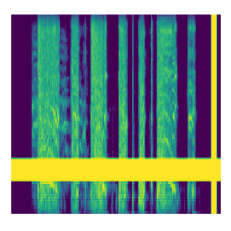

In [ ]:
for _ in range(1):
    img, label = symptomatic.next()
    print(img.shape)
    plt.imshow(img[2])
    plt.axis("off")
    plt.show()

**important library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow import keras
import datetime
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D
from keras.regularizers import l1
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation
import tensorflow.keras
import tensorflow.keras.metrics
from sklearn.utils import shuffle
import warnings


split the data

In [ ]:
!pip install split-folders
import splitfolders as sf
input_folder = "/content/drive/MyDrive/phase6/imageData"
output = "/content/drive/MyDrive/phase6/DataSplitting"
#where you want the split datasets saved. one will be created if none is set

sf.ratio(input_folder, output=output, seed=42, ratio=(.7, .2,.1))
#train ,val,test

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 33936 files [13:27, 42.04 files/s]


**read data and edit for model**

In [ ]:
from keras.backend import reshape
from keras.preprocessing.image import ImageDataGenerator

trdata = ImageDataGenerator(
                    rescale=1./255)

traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/phase6/DataSplitting/train",
                                       shuffle = True,
                                       seed = 7,
                                       class_mode="categorical",
                                       target_size=(256, 256),
                                       batch_size=256,
                                       color_mode='rgb',
                                       subset='training')
valdata = ImageDataGenerator(
                    rescale=1./255,
                    validation_split =.999)

val_generator = valdata.flow_from_directory(directory="/content/drive/MyDrive/phase6/DataSplitting/val",
    target_size=(256, 256),
    batch_size=256,
    shuffle = False,
    seed = 7,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')

tsdata =  ImageDataGenerator(rescale = 1.0/255)
test_generator = tsdata.flow_from_directory(directory="/content/drive/MyDrive/phase6/DataSplitting/test",
                                                    target_size=(256, 256),
                                                    batch_size=256,
                                                    shuffle = False,
                                                    color_mode='rgb',
                                                    class_mode='categorical')


Found 23754 images belonging to 2 classes.
Found 6778 images belonging to 2 classes.
Found 3396 images belonging to 2 classes.


(256, 256, 256, 3)


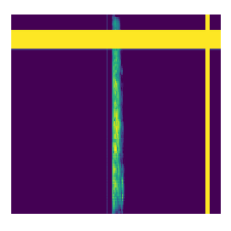

In [ ]:
for _ in range(1):
    img, label = traindata.next()
    print(img.shape)
    plt.imshow(img[2])
    plt.axis("off")
    plt.show()

(256, 256, 256, 3)


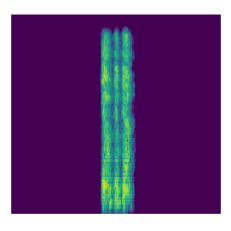

In [ ]:
for _ in range(1):
    img, label = val_generator.next()
    print(img.shape)
    plt.imshow(img[2])
    plt.axis("off")
    plt.show()

(256, 256, 256, 3)


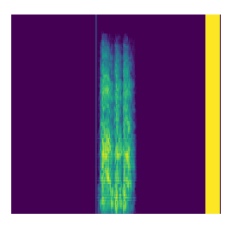

In [ ]:
for _ in range(1):
    img, label = test_generator.next()
    print(img.shape)
    plt.imshow(img[2])
    plt.axis("off")
    plt.show()

In [ ]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

def model_builder():
  # Specify model architecture
  model = Sequential()
  # Block 1
  model.add(Conv2D(16,(2, 2),
                  strides=(1,1),
                  activation='relu',
                  kernel_initializer='normal',
                  padding='valid',
                  input_shape=(256, 256, 3)))
  model.add(AveragePooling2D((2, 2),strides=(1,1),))
  model.add(Dropout(0.2))
  # Block 2
  model.add(Conv2D(16,(2, 2),
                  strides=(1,1),
                  activation='relu',
                  kernel_initializer='normal',
                  padding='valid',
                  input_shape=(256, 256, 3)))
  model.add(AveragePooling2D((2, 2),strides=(1,1),))
  model.add(Dropout(0.2))
  # FC part
  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, kernel_regularizer='l1_l2', activation='sigmoid'))

  # Print summary
  model.summary()
  OPT=tf.optimizers.Adam(learning_rate=0.001)
  # Compile model
  model.compile(optimizer= OPT, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = model_builder()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 255, 255, 16)      208       
                                                                 
 average_pooling2d (AverageP  (None, 254, 254, 16)     0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 254, 254, 16)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 253, 253, 16)      1040      
                                                                 
 average_pooling2d_1 (Averag  (None, 252, 252, 16)     0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 252, 252, 16)     

In [ ]:
import tensorflow as tf

NUM_EPOCHS = 500
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(traindata,
                    validation_data = val_generator,
                    callbacks = [earlystop],
                    epochs = NUM_EPOCHS)

Epoch 1/500
93/93 [==============================] - 122s 1s/step - loss: 0.5761 - accuracy: 0.8357 - val_loss: 0.2860 - val_accuracy: 0.9467
Epoch 2/500
93/93 [==============================] - 109s 1s/step - loss: 0.2401 - accuracy: 0.9600 - val_loss: 0.1848 - val_accuracy: 0.9731
Epoch 3/500
93/93 [==============================] - 116s 1s/step - loss: 0.1867 - accuracy: 0.9696 - val_loss: 0.1521 - val_accuracy: 0.9802
Epoch 4/500
93/93 [==============================] - 113s 1s/step - loss: 0.1505 - accuracy: 0.9788 - val_loss: 0.1320 - val_accuracy: 0.9817
Epoch 5/500
93/93 [==============================] - 113s 1s/step - loss: 0.1299 - accuracy: 0.9811 - val_loss: 0.1255 - val_accuracy: 0.9796
Epoch 6/500
93/93 [==============================] - 113s 1s/step - loss: 0.1152 - accuracy: 0.9832 - val_loss: 0.1158 - val_accuracy: 0.9827
Epoch 7/500
93/93 [==============================] - 112s 1s/step - loss: 0.1029 - accuracy: 0.9848 - val_loss: 0.0947 - val_accuracy: 0.9866
Epoch 

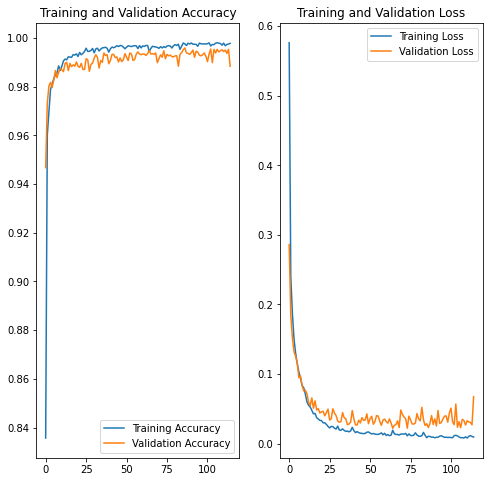

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(len(training_loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[1600    1]
 [  43 1752]]


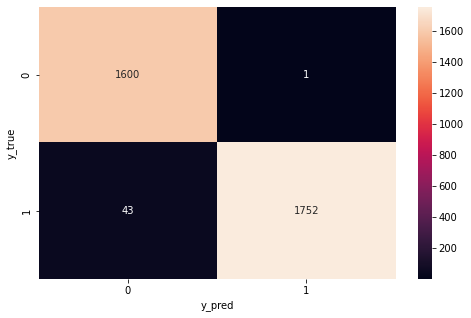

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator, 3396 // 256+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(test_generator.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
accuracy = model.evaluate(test_generator)
print('n', 'Test_Accuracy:-', accuracy[1])

14/14 [==============================] - 12s 827ms/step - loss: 0.0583 - accuracy: 0.9870
n Test_Accuracy:- 0.987043559551239


In [ ]:
test_generator.reset()
pred = model.predict_generator(test_generator, steps=50, verbose=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


50/50 [==============================] - 12s 223ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

labels = (traindata.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predictions = predictions[:3396]
filenames=test_generator.filenames

In [ ]:
print(len(filenames), len(predictions))

3396 3396


In [ ]:
import pandas as pd
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predicted_class_indices,
                      "actual":test_generator.classes})
results.to_csv("prediction_results.csv",index=False)

In [ ]:
val_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1601
           1       1.00      0.98      0.99      1795

    accuracy                           0.99      3396
   macro avg       0.99      0.99      0.99      3396
weighted avg       0.99      0.99      0.99      3396





```
# This is formatted as code
```

**save model as h5 format**

In [ ]:
model_name = "model-" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
keras.models.save_model(model, "/content/drive/MyDrive/AI_Team_graduation_project/fin_div_data/savedModels/" + model_name, save_format="h5")

In [ ]:
model.save('source_model_for_conversion.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("CNN_Final.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp381xi_c2/assets


130064668